# Explore Accuracy of Google AR

In [14]:
from __future__ import division

import os
import math
import time
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('white')

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.io as sio

In [2]:
!pwd

/Users/luca/Projects/SkyFall_GLM/PyCode


In [3]:
# path = '../SkyFall_GLM/TrainingData/HealthyS5/ActData/'
path = '../Phone Test/'

## Walking data

In [4]:
Act = sio.loadmat(path+'ActivityData_Walk.mat',squeeze_me=True)

In [5]:
type(Act)

dict

In [6]:
Act.keys()

dict_keys(['__version__', 'labels', '__header__', '__globals__', 'activity_detection'])

In [7]:
Act['activity_detection'][0][2]

'1503166509'

In [8]:
Act['activity_detection'][0]

(array(['UNKNOWN', 'STILL', 'ON_FOOT', 'ON_BICYCLE', 'WALKING',
       'IN_VEHICLE', 'RUNNING'], dtype=object), array([59, 15, 13,  8,  8,  5,  5], dtype=uint8), '1503166509')

In [9]:
Actdf = pd.DataFrame(Act['activity_detection'])  

In [10]:
Actdf['Timestamp']=Actdf['Timestamp'].astype('int')

In [11]:
Actdf['dt'] = Actdf['Timestamp'].diff()

In [12]:
Actdf.head()

,Type,Conf,Timestamp,dt
0,"[UNKNOWN, STILL, ON_FOOT, ON_BICYCLE, WALKING,...","[59, 15, 13, 8, 8, 5, 5]",1503166509,NaN
1,"[STILL, UNKNOWN, ON_BICYCLE, IN_VEHICLE, ON_FO...","[46, 25, 23, 4, 2, 2]",1503166552,43.0
2,"[UNKNOWN, ON_FOOT, WALKING, STILL, RUNNING]","[69, 25, 23, 6, 2]",1503166580,28.0
3,"[UNKNOWN, IN_VEHICLE, STILL, ON_FOOT, WALKING]","[48, 31, 18, 4, 4]",1503166610,30.0
4,"[UNKNOWN, ON_FOOT, WALKING, IN_VEHICLE, STILL]","[43, 29, 29, 25, 4]",1503166641,31.0


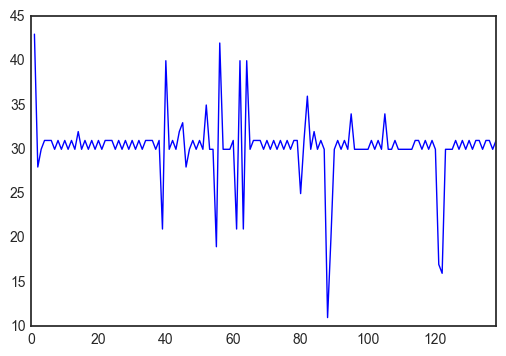

In [13]:
Actdf.dt.plot()

In [26]:
timerange = Actdf.Timestamp.apply(datetime.datetime.fromtimestamp)
print(timerange[0], ' ', timerange[timerange.index[-1]])

2017-08-19 13:15:09   2017-08-19 14:24:41


In [27]:
len(Actdf)

139

30.0


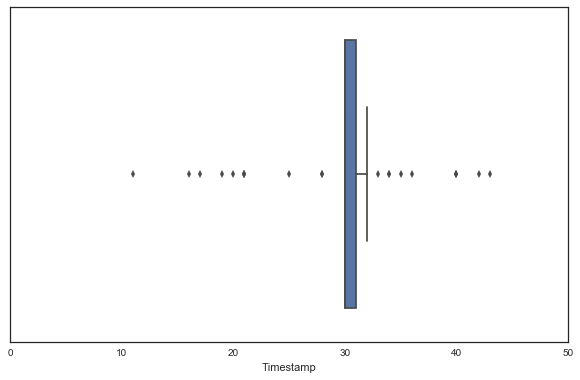

In [30]:
dt = Actdf['Timestamp'].diff()
plt.figure(figsize=(10,6))
sns.boxplot(dt)
plt.xlim(0,50)
print(dt.median())

In [31]:
Actdf.Type[0]

array([u'UNKNOWN', u'STILL', u'ON_FOOT', u'ON_BICYCLE', u'WALKING',
       u'IN_VEHICLE', u'RUNNING'], dtype=object)

In [155]:
if not isinstance(Actdf.Type[0],unicode):
    print 1

1


In [32]:
Actdf.Type[0:10]

0    [UNKNOWN, STILL, ON_FOOT, ON_BICYCLE, WALKING,...
1    [STILL, UNKNOWN, ON_BICYCLE, IN_VEHICLE, ON_FO...
2          [UNKNOWN, ON_FOOT, WALKING, STILL, RUNNING]
3       [UNKNOWN, IN_VEHICLE, STILL, ON_FOOT, WALKING]
4       [UNKNOWN, ON_FOOT, WALKING, IN_VEHICLE, STILL]
5     [ON_FOOT, WALKING, IN_VEHICLE, UNKNOWN, RUNNING]
6                       [ON_FOOT, WALKING, IN_VEHICLE]
7                       [ON_FOOT, WALKING, IN_VEHICLE]
8                                   [ON_FOOT, WALKING]
9                                   [ON_FOOT, WALKING]
Name: Type, dtype: object

In [45]:
def Act1(x): 
    if not isinstance(x,unicode):
        return x[0]
    else:
        return x

def Act2(x): 
    if not isinstance(x,unicode):
        return x[1]
    
def Conf1(x):
    if not isinstance(x,int):
        return x[0]
    else:
        return x
    
def Conf2(x):
    if not isinstance(x,int):
        return x[1]

In [46]:
Actdf['Activity1'] = Actdf.Type.map(Act1)
Actdf['Conf1'] = Actdf.Conf.map(Conf1)
Actdf['Activity2'] = Actdf.Type.map(Act2)
Actdf['Conf2'] = Actdf.Conf.map(Conf2)

In [47]:
type(Actdf.Conf[1])

numpy.ndarray

In [48]:
Actdf.head()

,Type,Conf,Timestamp,dt,Activity1,Conf1,Activity2,Conf2
0,"[UNKNOWN, STILL, ON_FOOT, ON_BICYCLE, WALKING,...","[59, 15, 13, 8, 8, 5, 5]",1503166509,NaN,UNKNOWN,59,STILL,15.0
1,"[STILL, UNKNOWN, ON_BICYCLE, IN_VEHICLE, ON_FO...","[46, 25, 23, 4, 2, 2]",1503166552,43.0,STILL,46,UNKNOWN,25.0
2,"[UNKNOWN, ON_FOOT, WALKING, STILL, RUNNING]","[69, 25, 23, 6, 2]",1503166580,28.0,UNKNOWN,69,ON_FOOT,25.0
3,"[UNKNOWN, IN_VEHICLE, STILL, ON_FOOT, WALKING]","[48, 31, 18, 4, 4]",1503166610,30.0,UNKNOWN,48,IN_VEHICLE,31.0
4,"[UNKNOWN, ON_FOOT, WALKING, IN_VEHICLE, STILL]","[43, 29, 29, 25, 4]",1503166641,31.0,UNKNOWN,43,ON_FOOT,29.0


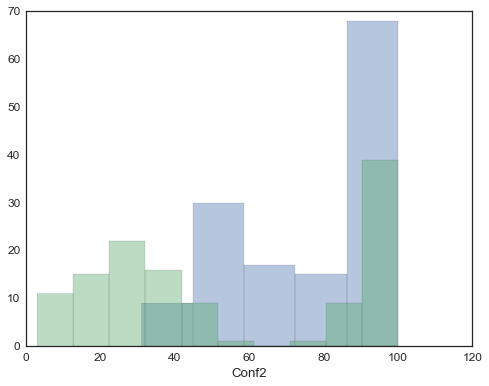

In [50]:
sns.set_context('paper',font_scale=1.5)
plt.figure(figsize=(8,6))
sns.distplot(Actdf.Conf1,kde=False)
sns.distplot(Actdf.Conf2.dropna(),kde=False,bins=10)

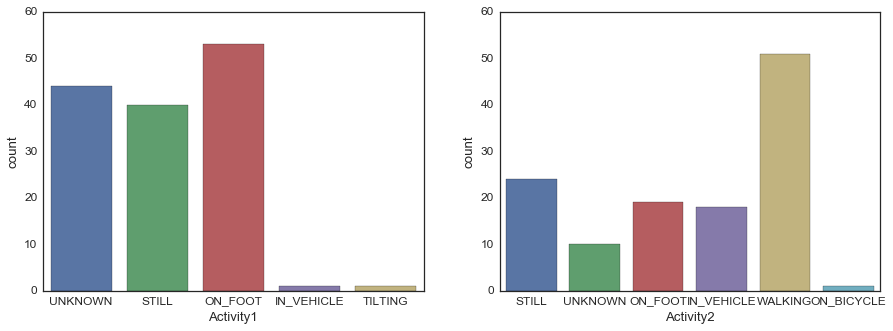

In [80]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
sns.countplot(Actdf.Activity1)
fig.add_subplot(122)
sns.countplot(Actdf.Activity2)

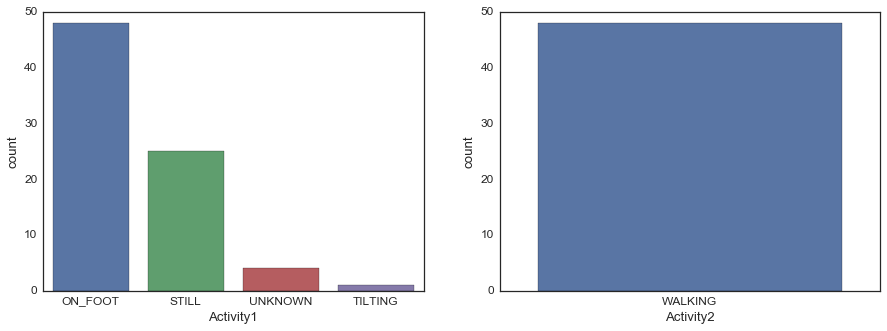

In [81]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
sns.countplot(Actdf[Actdf.Conf1>75].Activity1)
fig.add_subplot(122)
sns.countplot(Actdf[Actdf.Conf2>75].Activity2)

In [84]:
Actdf.Activity2.unique()

array([u'STILL', u'UNKNOWN', u'ON_FOOT', u'IN_VEHICLE', u'WALKING',
       u'ON_BICYCLE', None], dtype=object)

In [85]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['STILL','ON_FOOT','WALKING','RUNNING','ON_BICYCLE','IN_VEHICLE','TILTING','UNKNOWN'])
list(le.classes_)

['IN_VEHICLE',
 'ON_BICYCLE',
 'ON_FOOT',
 'RUNNING',
 'STILL',
 'TILTING',
 'UNKNOWN',
 'WALKING']

In [112]:
le.inverse_transform([0,1,2])

array(['IN_VEHICLE', 'ON_BICYCLE', 'ON_FOOT'],
      dtype='|S10')

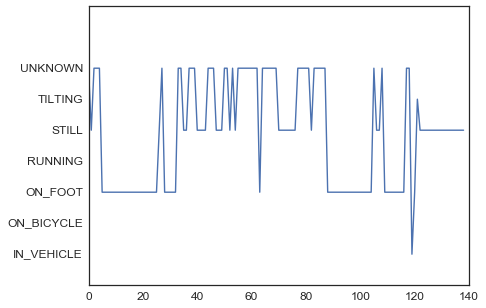

In [114]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
plt.plot(le.transform(Actdf.Activity1))
plt.ylim(-1,8)
g = plt.yticks(np.arange(7),list(le.classes_))
# fig.add_subplot(122)
# plt.plot(le.transform(Actdf.Activity2))
# plt.ylim(-1,8)
# plt.yticks(np.arange(7),list(le.classes_))


In [71]:
print(Actdf[Actdf.Conf1>75].Activity1.value_counts())
print(Actdf[Actdf.Conf1>75].Activity2.value_counts())

ON_FOOT    48
STILL      25
UNKNOWN     4
TILTING     1
Name: Activity1, dtype: int64
WALKING       48
IN_VEHICLE     8
ON_FOOT        2
STILL          2
UNKNOWN        1
ON_BICYCLE     1
Name: Activity2, dtype: int64


# In-vehicle

In [117]:
Act = sio.loadmat(path+'ActivityData_Car1.mat',squeeze_me=True)

In [118]:
Actdf = pd.DataFrame(Act['activity_detection'])  
Actdf['Timestamp']=Actdf['Timestamp'].astype('int')
Actdf['dt'] = Actdf['Timestamp'].diff()

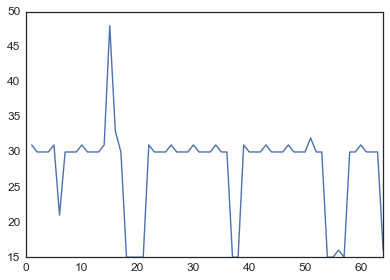

In [120]:
Actdf.dt.plot()

In [121]:
Actdf['Activity1'] = Actdf.Type.map(Act1)
Actdf['Conf1'] = Actdf.Conf.map(Conf1)
Actdf['Activity2'] = Actdf.Type.map(Act2)
Actdf['Conf2'] = Actdf.Conf.map(Conf2)

In [122]:
Actdf.head()

,Type,Conf,Timestamp,dt,Activity1,Conf1,Activity2,Conf2
0,"[STILL, IN_VEHICLE, ON_FOOT, WALKING]","[54, 31, 15, 15]",1503183603,NaN,STILL,54,IN_VEHICLE,31.0
1,"[STILL, IN_VEHICLE]","[85, 15]",1503183634,31.0,STILL,85,IN_VEHICLE,15.0
2,"[STILL, IN_VEHICLE]","[85, 15]",1503183664,30.0,STILL,85,IN_VEHICLE,15.0
3,"[STILL, IN_VEHICLE]","[77, 23]",1503183694,30.0,STILL,77,IN_VEHICLE,23.0
4,"[STILL, UNKNOWN, IN_VEHICLE]","[62, 23, 15]",1503183724,30.0,STILL,62,UNKNOWN,23.0


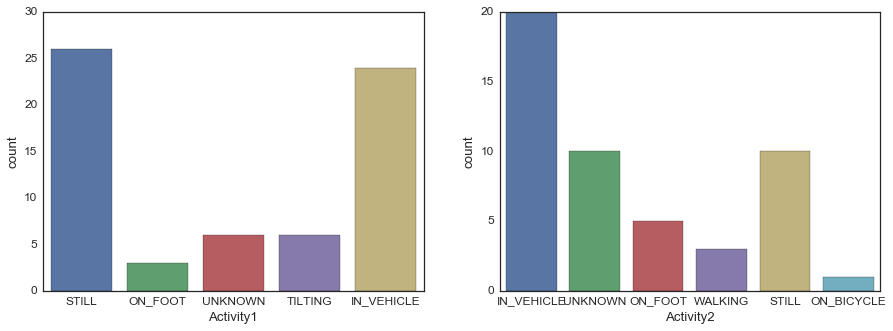

In [123]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
sns.countplot(Actdf.Activity1)
fig.add_subplot(122)
sns.countplot(Actdf.Activity2)

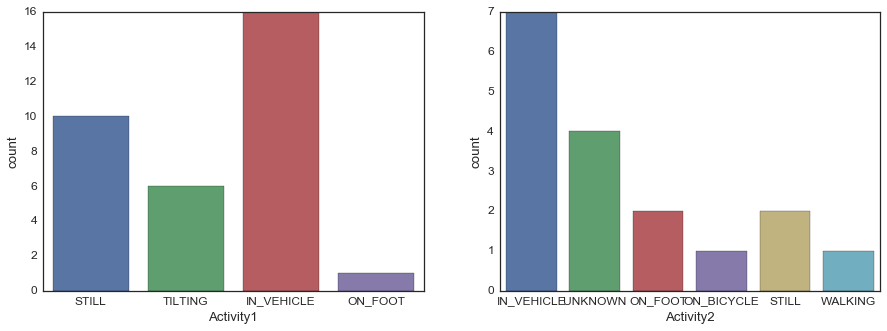

In [125]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
sns.countplot(Actdf[Actdf.Conf1>75].Activity1)
fig.add_subplot(122)
sns.countplot(Actdf[Actdf.Conf1>75].Activity2)

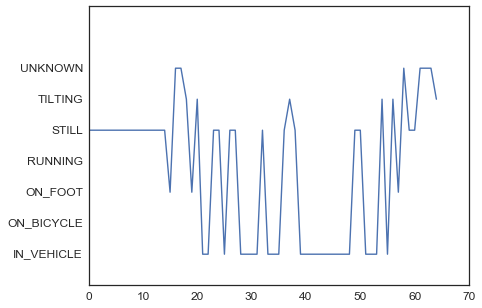

In [126]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
plt.plot(le.transform(Actdf.Activity1))
plt.ylim(-1,8)
g = plt.yticks(np.arange(7),list(le.classes_))
